In [1]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-beta1

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.4.1


In [2]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

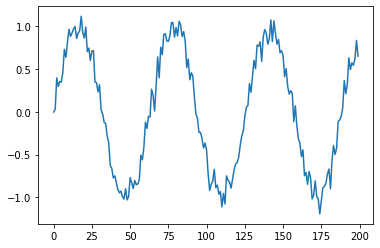

In [45]:
series = np.sin(0.1*np.arange(200)) + np.random.randn(200)*0.1

# plot it
plt.plot(series)
plt.show()

In [46]:
#### se crea el set de datos 
#### ejemplor si tengo 200 puntos en el tiempo tendre 200 - (ventana) + 1
#### si quiero usar t-20 tendre 181 ventanas de tiempo
#### desde la 21 hasta la 200

In [47]:
T = 10
X = []
Y = []

for t in range(len(series)-T):

  x = series[t:T+t]
  X.append(x)
  y = series[T+t]
  Y.append(y)

X = np.array(X).reshape(-1,T)
Y = np.array(Y)

print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (190, 10) Y.shape (190,)


In [48]:
i = Input(shape=(T,))
x = Dense(1)(i)

model = Model(i,x)

model.compile(loss = 'mse',optimizer = Adam(lr = 0.1))

X_train, Y_train = X[:int(190*0.5)],Y[:int(190*0.5)]
X_test, Y_test = X[int(190*0.5):],Y[int(190*0.5):]

print("X_train", X_train.shape, "Y_train.shape", Y_train.shape)

print("X_test", X_test.shape, "y_test.shape", Y_test.shape)

X_train (95, 10) Y_train.shape (95,)
X_test (95, 10) y_test.shape (95,)


In [49]:
r = model.fit(X_train,Y_train, validation_data=(X_test,Y_test),epochs = 100)

Epoch 1/100
3/3 [==============================] - 0s 67ms/step - loss: 0.7899 - val_loss: 0.4416
Epoch 2/100
3/3 [==============================] - 0s 20ms/step - loss: 0.3746 - val_loss: 0.1686
Epoch 3/100
3/3 [==============================] - 0s 20ms/step - loss: 0.1563 - val_loss: 0.0561
Epoch 4/100
3/3 [==============================] - 0s 19ms/step - loss: 0.0427 - val_loss: 0.0780
Epoch 5/100
3/3 [==============================] - 0s 20ms/step - loss: 0.0776 - val_loss: 0.0638
Epoch 6/100
3/3 [==============================] - 0s 20ms/step - loss: 0.0718 - val_loss: 0.1316
Epoch 7/100
3/3 [==============================] - 0s 22ms/step - loss: 0.1001 - val_loss: 0.0740
Epoch 8/100
3/3 [==============================] - 0s 21ms/step - loss: 0.0694 - val_loss: 0.0493
Epoch 9/100
3/3 [==============================] - 0s 20ms/step - loss: 0.0434 - val_loss: 0.0290
Epoch 10/100
3/3 [==============================] - 0s 23ms/step - loss: 0.0303 - val_loss: 0.0244
Epoch 11/100
3/3 [=

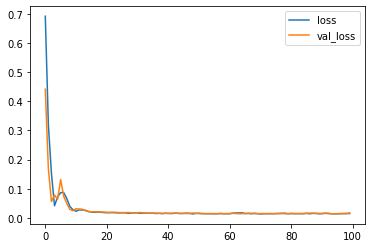

In [50]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [51]:
####### forma incorrecta de hacer la prediccion

datos_forecast = Y_test.copy()
predicciones = []

for a in range(int(len(Y)*0.5), len(Y)-1):



  predicciones.append(model.predict(X[a].reshape(1,-1))[0])
  

In [52]:
predicciones = np.array(predicciones).flatten()


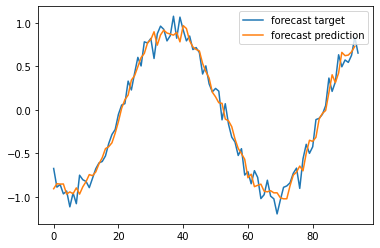

In [53]:
plt.plot(datos_forecast, label='forecast target')
plt.plot(predicciones, label='forecast prediction')
plt.legend()

In [54]:
####### forma correcta de hacer la prediccion

datos_forecast = Y_test.copy()
predicciones = []

x_pred = X[int(len(Y)*0.5)]

for a in range(int(len(Y)*0.5), len(Y)-1):


  p = model.predict(x_pred.reshape(1,-1))[0]
  predicciones.append(p)

  x_pred = np.roll(x_pred, -1)
  x_pred[-1] = p
  

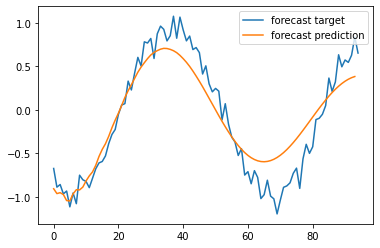

In [55]:
plt.plot(datos_forecast, label='forecast target')
plt.plot(predicciones, label='forecast prediction')
plt.legend()